In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data, again
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [3]:
# Import the data
admiss_core = pd.read_csv("../data/AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("../data/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("../data/PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("../data/LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [57]:
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


PatientID
1A8791E3-A61C-455A-8DEE-763EB90C9B2C    130.4
1A8791E3-A61C-455A-8DEE-763EB90C9B2C    144.7
1A8791E3-A61C-455A-8DEE-763EB90C9B2C    132.0
1A8791E3-A61C-455A-8DEE-763EB90C9B2C    146.1
1A8791E3-A61C-455A-8DEE-763EB90C9B2C    140.8
                                        ...  
F0B53A2C-98CA-415D-B928-E3FD0E52B22A    140.7
F0B53A2C-98CA-415D-B928-E3FD0E52B22A    150.5
F0B53A2C-98CA-415D-B928-E3FD0E52B22A    130.3
F0B53A2C-98CA-415D-B928-E3FD0E52B22A    143.3
F0B53A2C-98CA-415D-B928-E3FD0E52B22A    147.0
Name: LabValue, Length: 3207, dtype: float64

In [33]:
##################################################################################################################
# Convert dates to datetime objects
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [ ]:
# YouDo: Compute the mean and standard deviation of the LabValue across all of the METABOLIC: SODIUM tests (all patients)
labs_core.loc[labs_core.LabName.str.startswith('METABOLIC: SODIUM')].LabValue

# 1) First, make a dataframe that's a subset of the labs table and only inludes labs with  LabName of METABOLIC: SODIUM 
#
#  Something like:
# MetSodiumLabs = labs_core.loc[   ...


# 2) From that subset, get all the LabValue numbers
#


# 3) Compute the mean and standard deviation of those lab values and print them 



Text(0, 0.5, 'Count')

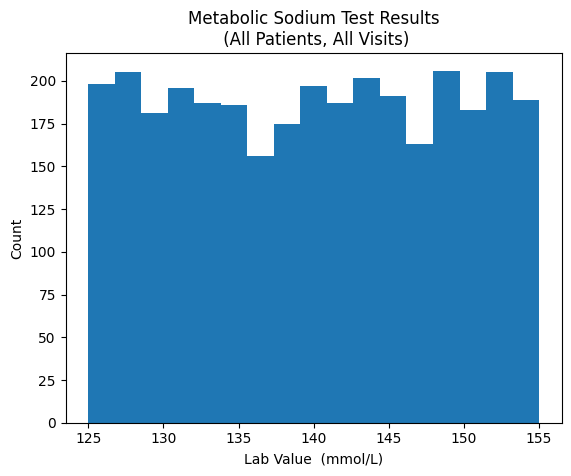

In [55]:

##################################################################################################################
# YouDo: Make a histogram of the LabValues for all metabolic sodium tests.
#    Ensure the histogram has 30 bins, an appropriate title and meaningful labels on the axes
##################################################################################################################
plt.figure()
plt.hist(labs_core.loc[labs_core.LabName.str.startswith('METABOLIC: SODIUM')].LabValue,17)
plt.title('Metabolic Sodium Test Results\n (All Patients, All Visits)')
plt.xlabel("Lab Value  (mmol/L)")
plt.ylabel("Count")




Text(0, 0.5, 'Count')

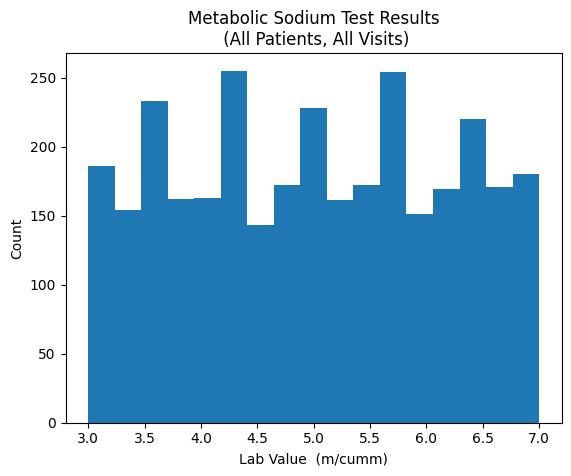

In [56]:
##################################################################################################################
# YouDo: Make a similar histogram of the LabValues for all CBC: RED BLOOD CELL COUNT tests

plt.figure()
plt.hist(labs_core.loc[labs_core.LabName.str.startswith("CBC: RED BLOOD CELL COUNT")].LabValue,17)
plt.title('Metabolic Sodium Test Results\n (All Patients, All Visits)')
plt.xlabel("Lab Value  (m/cumm)")
plt.ylabel("Count")


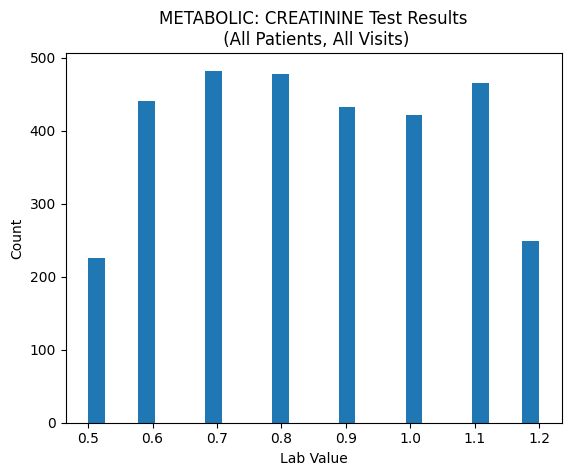

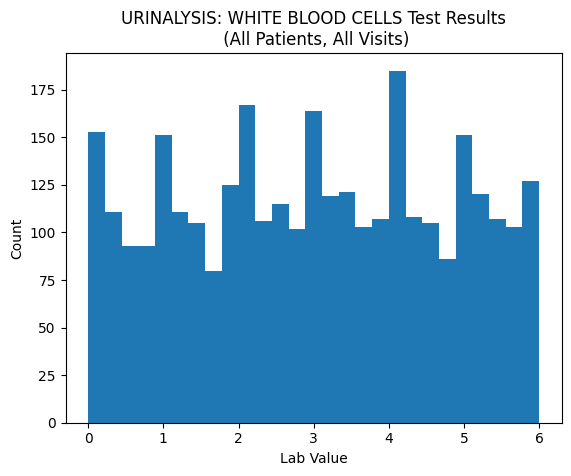

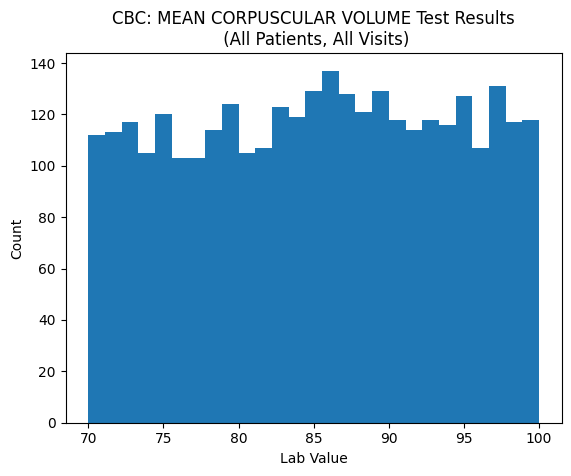

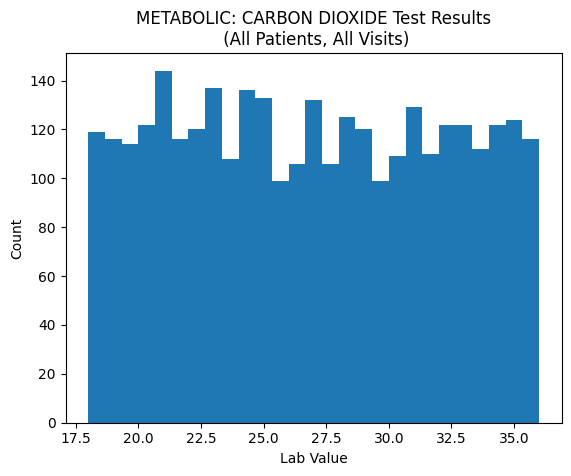

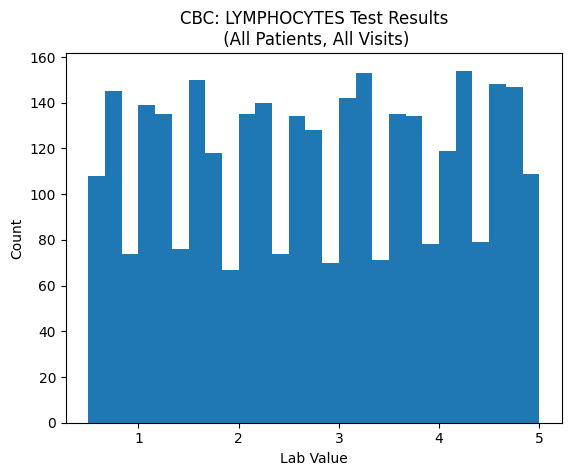

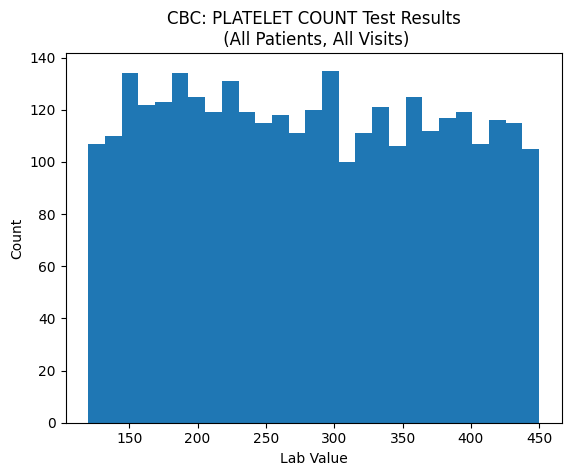

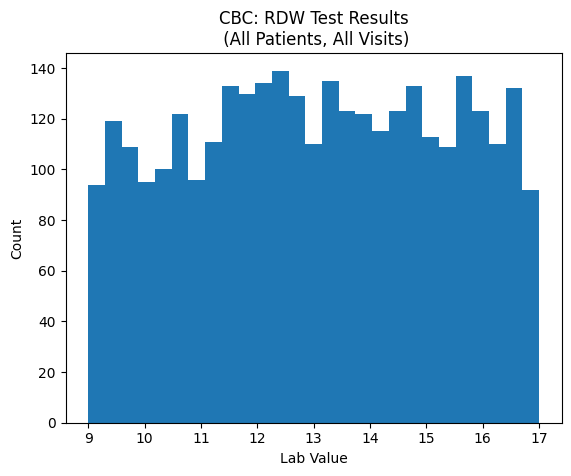

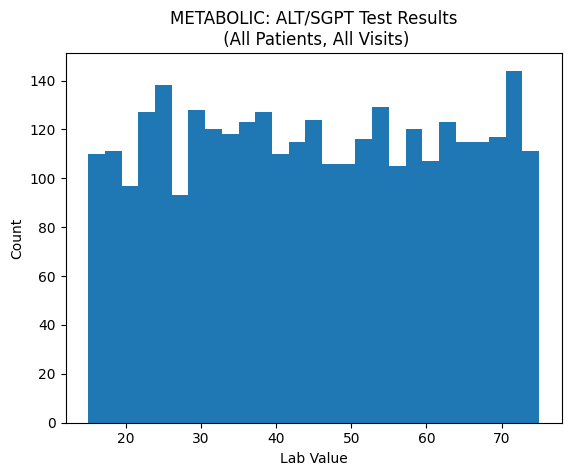

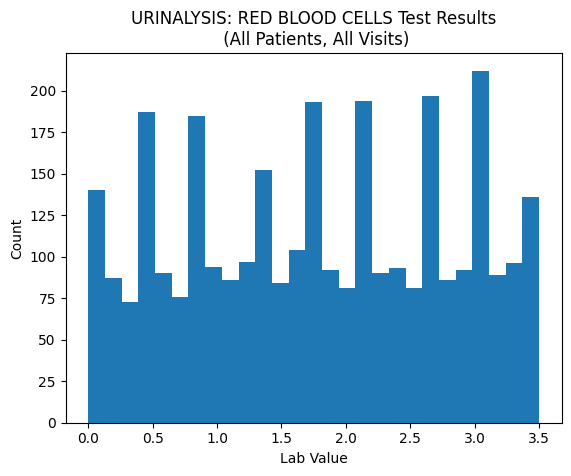

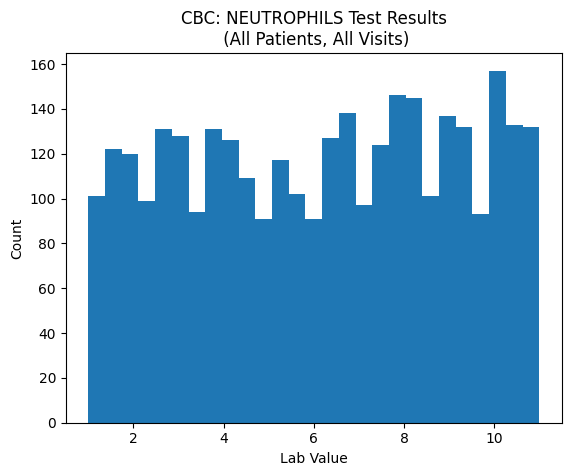

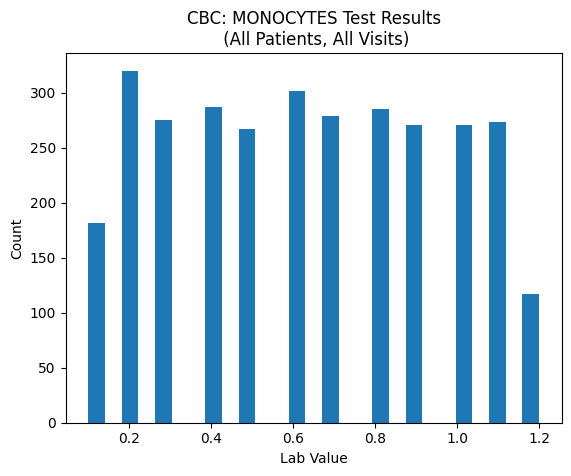

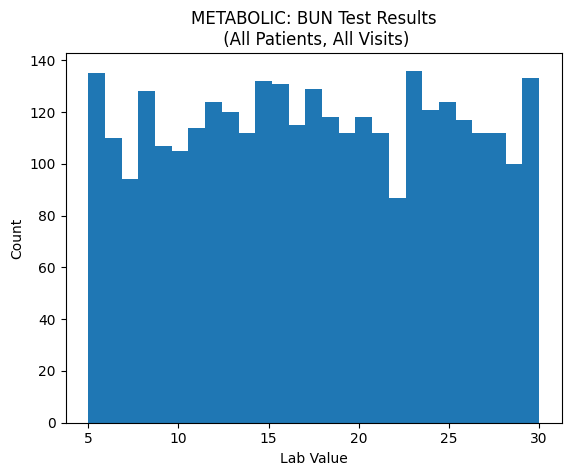

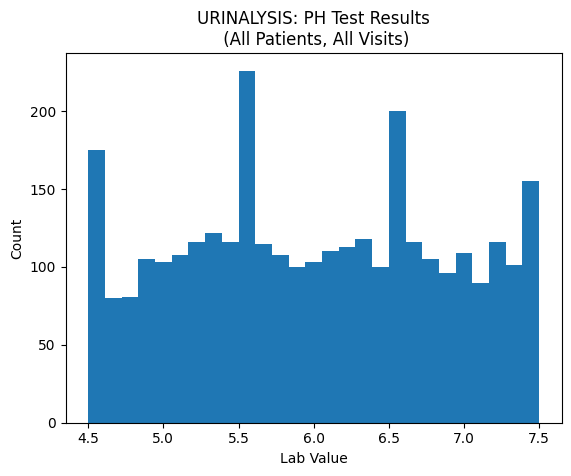

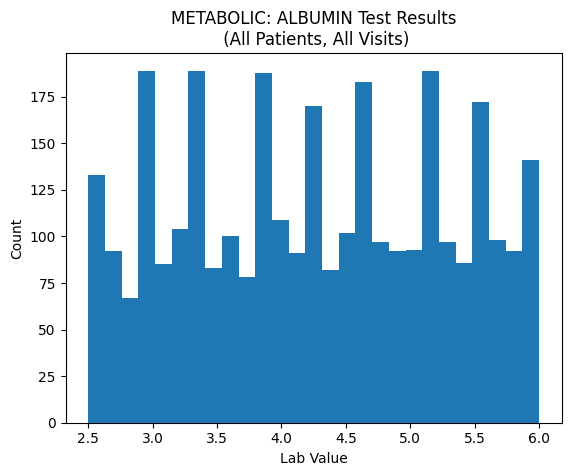

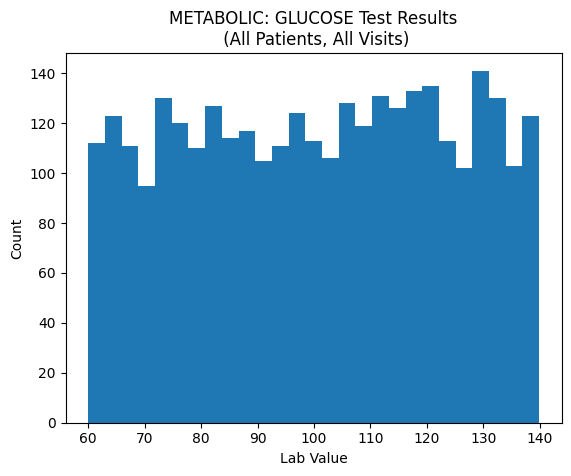

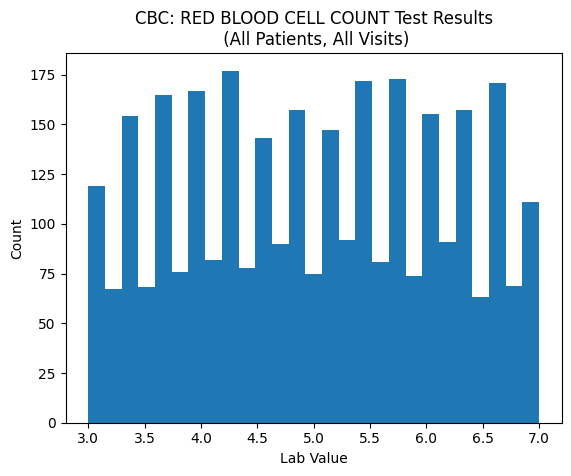

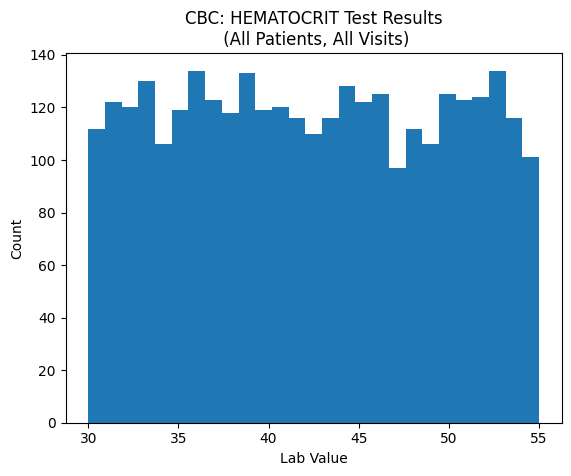

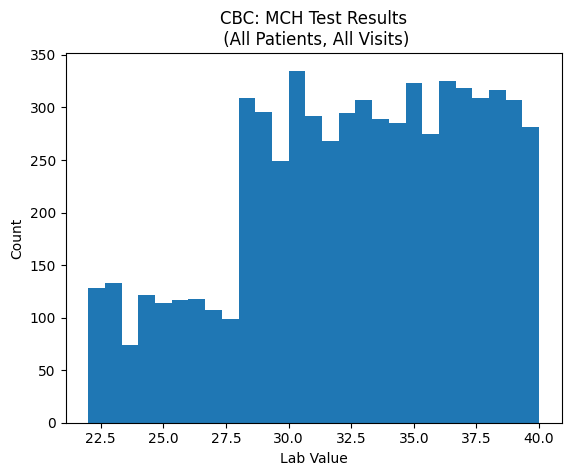

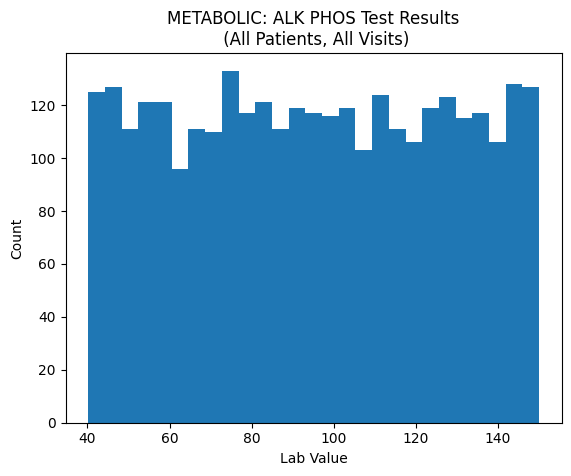

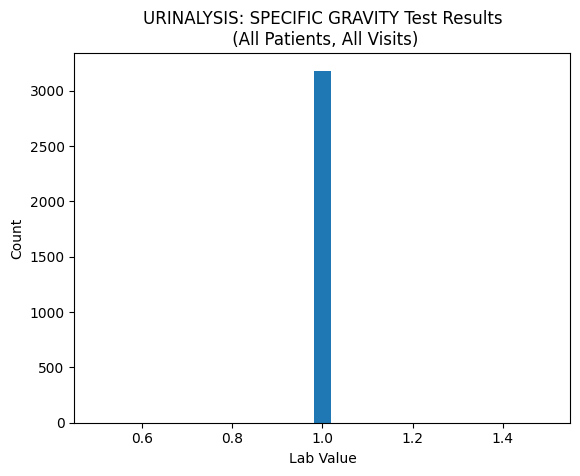

In [61]:
# Stretch:  Use a loop to make similar histograms for 20 randomly selected tests

allabs = pd.Series(labs_core.LabName.unique())
for thislab in allabs.sample(20):
    plt.figure()
    plt.hist(labs_core.loc[labs_core.LabName.str.startswith(thislab)].LabValue,27)
    plt.title(f'{thislab} Test Results\n (All Patients, All Visits)')
    plt.xlabel(f"Lab Value")
    plt.ylabel("Count")

# Analysis: a PI Question

You mentioned in your email that this is synthetic data.  Can we expect the real data to look like this?

(You have a meeting with the PI in 10 minutes.  Below, write how you'd answer.  Include appropriate caveats based 
on your present knowledge and expertise.)


On that synthetic data question...  I checked the Mayo Clinic website for the normal ranges for these tests.  Both of them are in the same units mentioned in the article and include ranges which are "normal" and some distince on either side of normal.   I have no idea how much deviation outside the normal range is routinely encountered in a hospital setting.

I'm a bit concerned about the distribution of this data.  In both cases, it's pretty flat--seemingly uniformly distributed.   I don't know anything about blood chemistry, however in general, repeated measurements taken over a large population in the real world tend to converge to a bell-curve distribution.  

So, in short, the data seem to be in the right units and cover "reasonable" ranges, but the distribution of real data my not look the same.